# CMB-S4 All Chile config LAT ILC curves

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np, glob, healpy as H, os, sys
from pylab import *

import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.ERROR)

In [3]:
rcParams['figure.dpi'] = 150
rcParams['figure.facecolor'] = 'white'
rcParams['font.family'] = 'serif'

# Read and plot ILC curves

In [13]:
survey_dic = {
             'lat_wide': ['wide_supplement', r'LAT-Wide'],
             'lat_roman': ['roman_supplement', r'LAT-Roman'], 
             'lat_delensing': ['delensing_sun90bk', r'LAT-Delensing'], 
             }


lmax = 6500
total_years = 10
results_fd_pref = 'results/s4_all_chile_config_ilc_results/lmax_%s/' %(lmax)
results_fd_suff = 'planck_mask/TT-EE/baseline'

spec_arr = ['TT', 'EE']
spec_arr_str = '-'.join(spec_arr)

freq_arr = [27, 39, 93, 145, 225, 278]
freq_arr_str = '-'.join(['%s' %(nu) for nu in freq_arr])
#print(freq_arr_str)

expname_pref = 's4_all_chile_config'
survey_arr = ['lat_wide', 'lat_delensing', 'lat_roman']
patch_arr = [1, 2, 3, 4]



Plot ILC residuals


<Figure size 900x600 with 0 Axes>

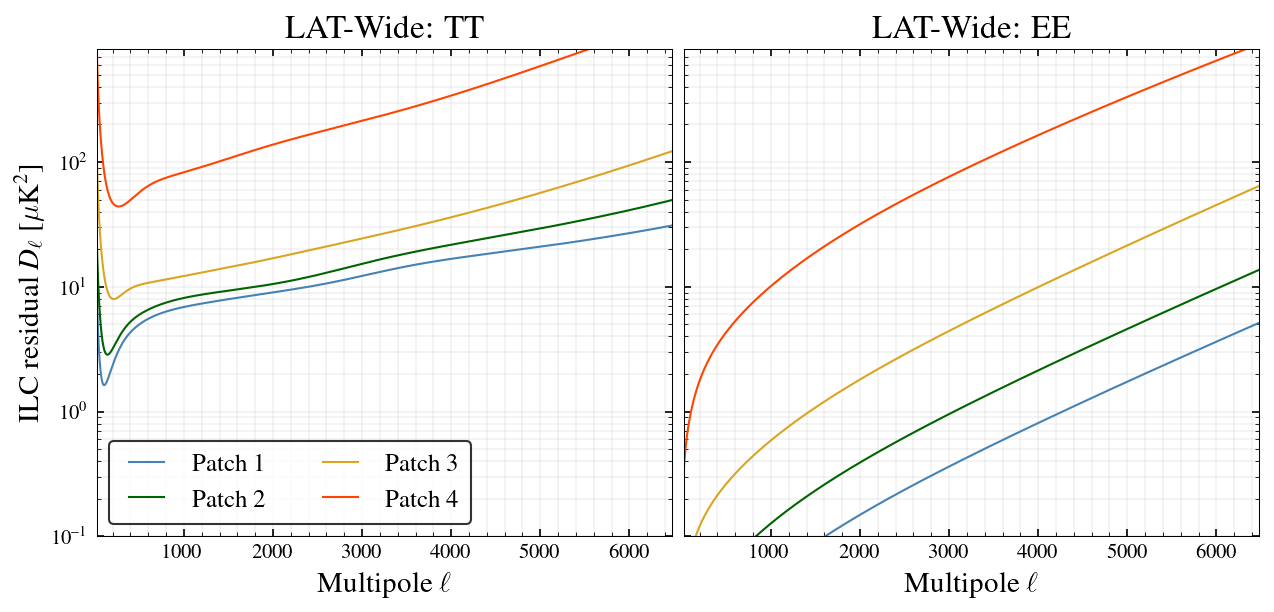

<Figure size 900x600 with 0 Axes>

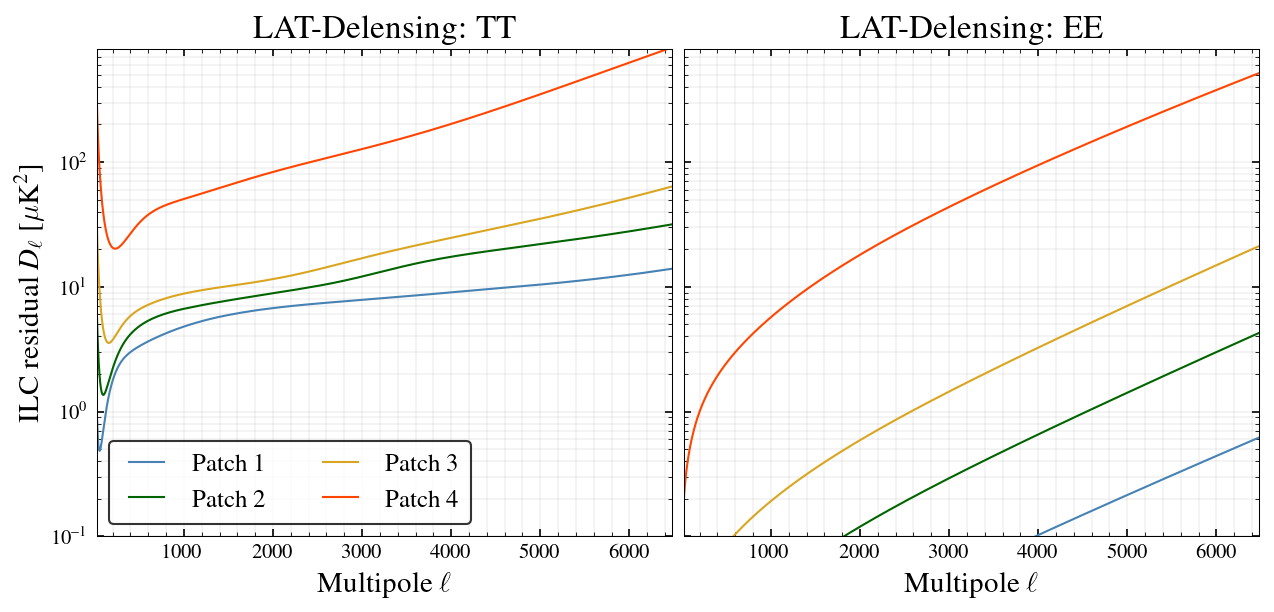

<Figure size 900x600 with 0 Axes>

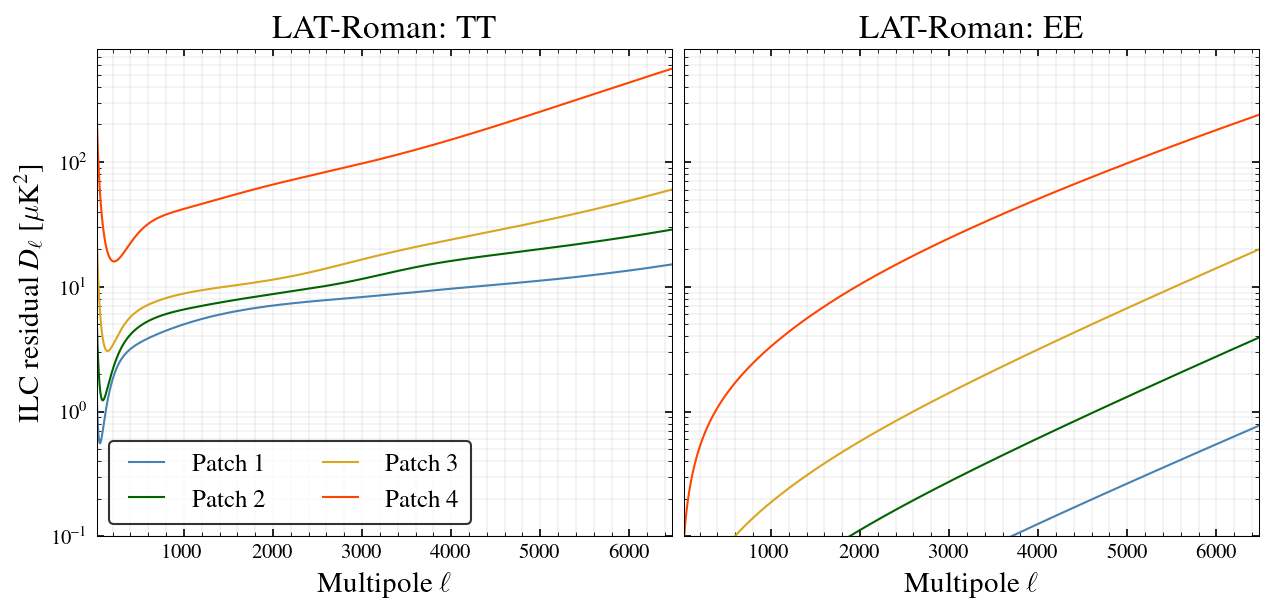

In [34]:
#No galaxy
include_gal = 0
ilc_dic = {}
for survey in survey_arr:
    ##print(survey)
    ilc_dic[survey] = {}
    for patch in patch_arr:
        ##print(patch)
        curr_survey_plus_patch_name = '%s_%s---patch%s' %(expname_pref, survey, patch)
        curr_fd = '%s/%s/%s/' %(results_fd_pref, curr_survey_plus_patch_name, results_fd_suff)
        curr_fname = '%s/%s_ilc_galaxy%s_%s_%s_lmax%s_for%syears.npy' %(curr_fd, curr_survey_plus_patch_name, include_gal, freq_arr_str, spec_arr_str, lmax, total_years)
        
        curr_ilc_dic = np.load( curr_fname, allow_pickle=True).item()
        el_, cl_residual_dic = curr_ilc_dic['el'], curr_ilc_dic['cl_residual']
        
        #print(curr_ilc_dic.keys())
        ilc_dic[survey][patch] = [el_, cl_residual_dic]

        
#plot
print('\nPlot ILC residuals')
for survey in survey_arr:
    surveyval, surveylabval = survey_dic[survey]
    ##print( survey )
    
    clf()
    fsval = 14
    figure(figsize = (10., 4.3))
    tr, tc = 1, len(spec_arr)
    color_arr = ['steelblue', 'darkgreen', 'goldenrod', 'orangered']
    subplots_adjust(wspace = 0.02)
    for speccntr, spec in enumerate( spec_arr ):
        ax = subplot(tr, tc, speccntr+1, yscale = 'log')
        
        for patch in patch_arr:
            el_, cl_residual_dic = ilc_dic[survey][patch]
            cl_residual_spec = cl_residual_dic[spec]
            
            dl_fac = el_ * (el_+1)/2/np.pi
            plot(el_, dl_fac * cl_residual_spec, color = color_arr[patch-1], label = r'Patch %s' %(patch))
            
        if speccntr == 0:
            legend(loc = 3, fontsize = fsval-2, ncol = 2)
            ylabel(r'ILC residual $D_{\ell}$ [$\mu$K$^{2}$]', fontsize = fsval)
            ylim(0.1, 8e2)
        else:
            setp(ax.get_yticklabels(), visible=False)
            ylim(0.1, 8e2)
            
        xlim(20, lmax-20)
            
        xlabel(r'Multipole $\ell$', fontsize = fsval)
        
        title(r'%s: %s' %(surveylabval, spec), fontsize = fsval + 2)
        grid(True, which = 'both', axis = 'both', lw = 0.2, alpha = 0.2)
        
    plname = 'plots/%s_ilc_results_no_galaxy.png' %(survey)
    savefig(plname, dpi = 200.)
    show(); 


# With and without galaxy for LAT-Wide

dict_keys([0, 1])

Plot ILC residuals


<Figure size 900x600 with 0 Axes>

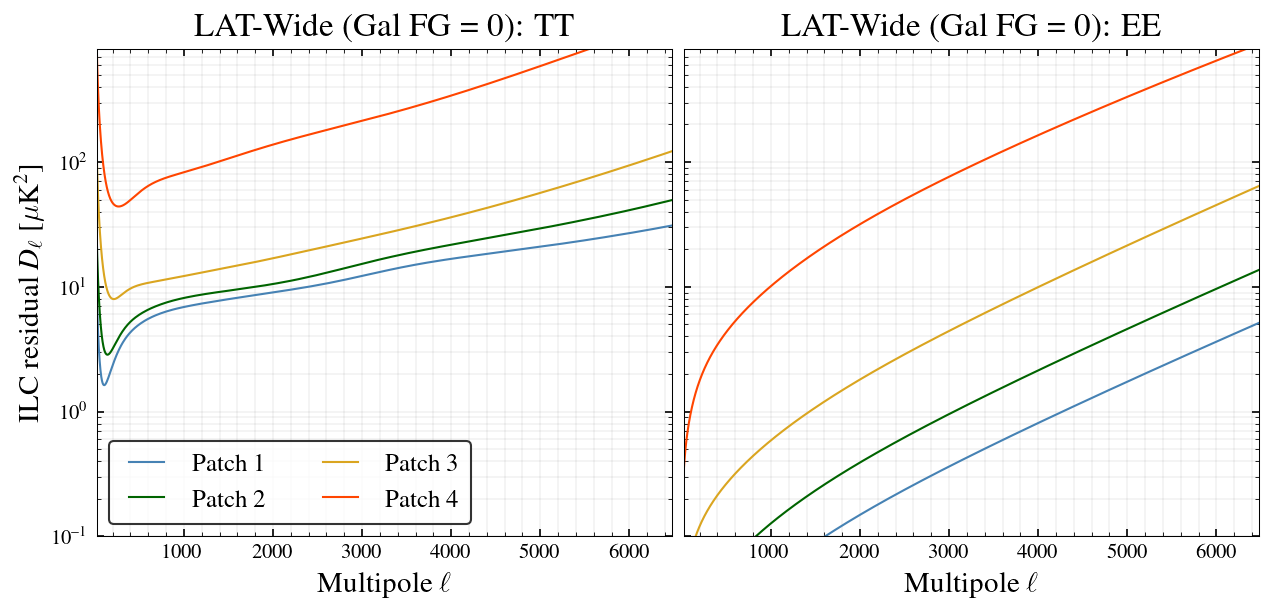

<Figure size 900x600 with 0 Axes>

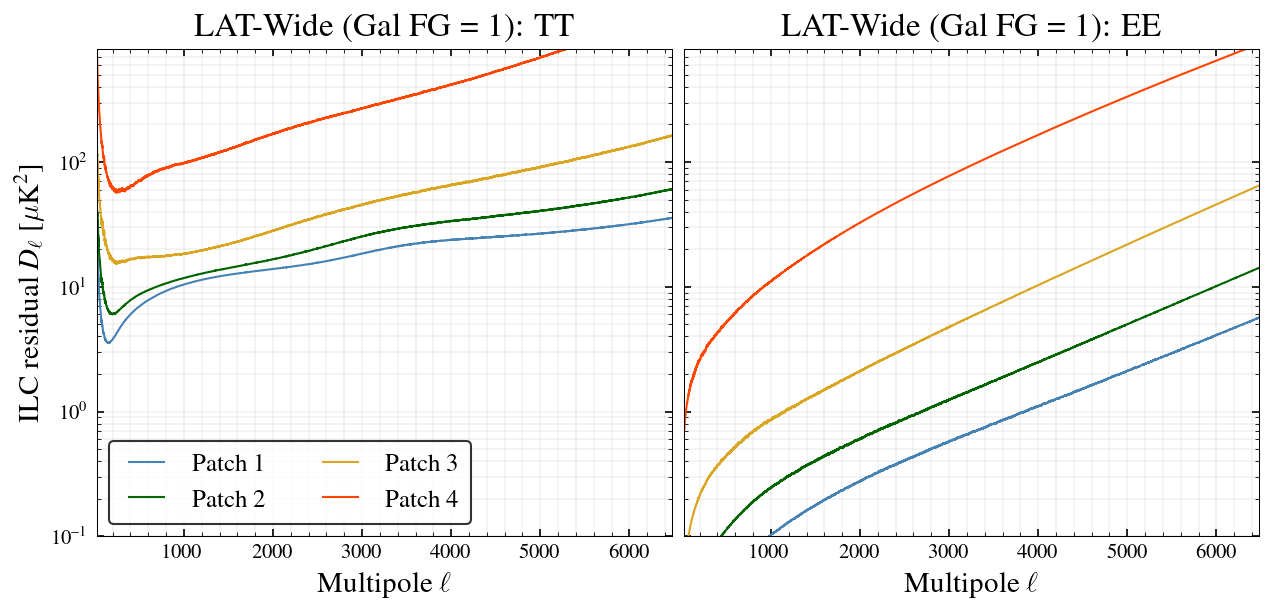

In [35]:
#No galaxy
survey = 'lat_wide'
include_gal_arr = [0, 1]
gal_mask = 2 #when Galactic foreground is included. Check README.md in https://github.com/sriniraghunathan/DRAFT/blob/master/README.md
lat_wide_ilc_dic = {}
for include_gal  in include_gal_arr:
    lat_wide_ilc_dic[include_gal] = {}
    for patch in patch_arr:
        curr_survey_plus_patch_name = '%s_%s---patch%s' %(expname_pref, survey, patch)
        curr_fd = '%s/%s/%s/' %(results_fd_pref, curr_survey_plus_patch_name, results_fd_suff)
        if include_gal:
            curr_fname = '%s/%s_ilc_galaxy%s_%s_%s_galmask%s_AZ_lmax%s_for%syears.npy' %(curr_fd, curr_survey_plus_patch_name, include_gal, freq_arr_str, spec_arr_str, gal_mask, lmax, total_years)
        else:
            curr_fname = '%s/%s_ilc_galaxy%s_%s_%s_lmax%s_for%syears.npy' %(curr_fd, curr_survey_plus_patch_name, include_gal, freq_arr_str, spec_arr_str, lmax, total_years)
        
        curr_ilc_dic = np.load( curr_fname, allow_pickle=True).item()
        el_, cl_residual_dic = curr_ilc_dic['el'], curr_ilc_dic['cl_residual']
        
        #print(curr_ilc_dic.keys())
        lat_wide_ilc_dic[include_gal][patch] = [el_, cl_residual_dic]

print(lat_wide_ilc_dic.keys())

#plot
print('\nPlot ILC residuals')
surveyval, surveylabval = survey_dic[survey]
for include_gal  in include_gal_arr:
    clf()
    fsval = 14
    figure(figsize = (10., 4.3))
    tr, tc = 1, len(spec_arr)
    color_arr = ['steelblue', 'darkgreen', 'goldenrod', 'orangered']
    subplots_adjust(wspace = 0.02)
    for speccntr, spec in enumerate( spec_arr ):
        ax = subplot(tr, tc, speccntr+1, yscale = 'log')
        
        for patch in patch_arr:
            el_, cl_residual_dic = lat_wide_ilc_dic[include_gal][patch]
            cl_residual_spec = cl_residual_dic[spec]
            
            dl_fac = el_ * (el_+1)/2/np.pi
            plot(el_, dl_fac * cl_residual_spec, color = color_arr[patch-1], label = r'Patch %s' %(patch))
            
        if speccntr == 0:
            legend(loc = 3, fontsize = fsval-2, ncol = 2)
            ylabel(r'ILC residual $D_{\ell}$ [$\mu$K$^{2}$]', fontsize = fsval)
            ylim(0.1, 8e2)
        else:
            setp(ax.get_yticklabels(), visible=False)
            ylim(0.1, 8e2)
            
        xlim(20, lmax-20)
            
        xlabel(r'Multipole $\ell$', fontsize = fsval)
        
        title(r'%s (Gal FG = %s): %s' %(surveylabval, include_gal, spec), fontsize = fsval + 2)
        grid(True, which = 'both', axis = 'both', lw = 0.2, alpha = 0.2)
        
    if include_gal:
        plname = 'plots/%s_ilc_results_with_galaxy.png' %(survey)
    else:
        plname = 'plots/%s_ilc_results_no_galaxy.png' %(survey)
    savefig(plname, dpi = 200.)
    show(); 
